In [2]:
df = pd.read_csv('modelingv2.csv')

In [3]:
# Splitting, decided on 60 - 40 split due to having to work with a huge training set
# Would usually do 80 - 20 but the data set is very intense for my cpu

df_train, df_test = train_test_split(df, test_size=0.4, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['pitch_type'])]
Y_train = df_train['pitch_type']
X_test = df_test.loc[:, ~(df_test.columns).isin(['pitch_type'])]
Y_test = df_test['pitch_type']

In [6]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['pitch_type'])]
    y = dataframe['pitch_type']
    y_pred = cross_val_predict(model, x, y, cv = 3)
    accuracy = accuracy_score(y, y_pred)
    macro = f1_score(y, y_pred, average='macro')
    micro = f1_score(y, y_pred, average='micro')
    weighted = f1_score(y, y_pred, average='weighted')
    print(model)
    print('Accuracy:', accuracy)
    print('F1 Macro:', macro)
    print('F1 Micro:', micro)
    print('F1 Weighted:', weighted)
    print(classification_report(y, y_pred))

In [10]:
# Would have used Gradient Boosting Classifier but the kernal kept crashing
# My strategy while modeling is to use the default parameters to see if I can drop
# Any models for next round

adac = AdaBoostClassifier(random_state = 12)
rfc = RandomForestClassifier(random_state=12)
mlp = MLPClassifier(random_state=12)
ridge = RidgeClassifier(random_state=12)

In [13]:
get_metrics(rfc, df_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)
Accuracy: 0.457414819173
F1 Macro: 0.378668477829
F1 Micro: 0.457414819173
F1 Weighted: 0.442087767261
             precision    recall  f1-score   support

         CH       0.27      0.22      0.24     43569
         CU       0.29      0.24      0.26     33759
         EP       0.00      0.00      0.00        84
         FA       0.51      0.64      0.57    143423
         FC       0.42      0.34      0.38     24964
         FS       0.34      0.21      0.26      6297
         FT       0.43      0.39      0.41     48718
         IN       0.96      0.69      0.80      2417
         KC 

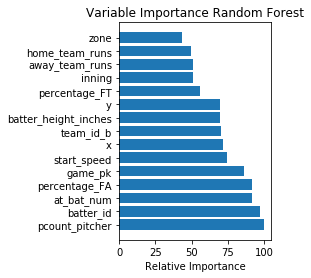

In [14]:
rfc.fit(X_train, Y_train)
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

In [15]:
get_metrics(mlp, df_train)

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=12, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
Accuracy: 0.333544187518
F1 Macro: 0.035731226675
F1 Micro: 0.333544187518
F1 Weighted: 0.166851201585
             precision    recall  f1-score   support

         CH       0.00      0.00      0.00     43569
         CU       0.00      0.00      0.00     33759
         EP       0.00      0.00      0.00        84
         FA       0.33      1.00      0.50    143423
         FC       0.00      0.00      0.00     24964
         FS       0.00      0.00      0.00      6297
         FT       0.00      0.00      0.00     48718
         IN       0.00      0.00      0.

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
get_metrics(ridge, df_train)

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
Accuracy: 0.48288708991
F1 Macro: 0.326031173343
F1 Micro: 0.48288708991
F1 Weighted: 0.421480191417
             precision    recall  f1-score   support

         CH       0.34      0.06      0.10     43569
         CU       0.40      0.07      0.12     33759
         EP       0.00      0.00      0.00        84
         FA       0.49      0.79      0.60    143423
         FC       0.48      0.31      0.38     24964
         FS       0.38      0.06      0.11      6297
         FT       0.43      0.42      0.42     48718
         IN       1.00      0.70      0.82      2417
         KC       0.47      0.08      0.13      5123
         KN       0.80      1.00      0.89      2666
         PO       0.00      0.00      0.00       539
         SC       0.31      0.05      0.09        73
         SI       0.52      0.84     

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
get_metrics(adac, df_train)

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Accuracy: 0.422007595402
F1 Macro: 0.145682948926
F1 Micro: 0.422007595402
F1 Weighted: 0.269094850098
             precision    recall  f1-score   support

         CH       0.00      0.00      0.00     43569
         CU       0.23      0.00      0.00     33759
         EP       0.00      0.00      0.00        84
         FA       0.41      0.91      0.56    143423
         FC       0.00      0.00      0.00     24964
         FS       0.00      0.00      0.00      6297
         FT       0.27      0.00      0.01     48718
         IN       0.00      0.00      0.00      2417
         KC       0.00      0.00      0.00      5123
         KN       0.79      0.66      0.72      2666
         PO       0.00      0.00      0.00       539
         SC       0.09      0.18      0.12        73
         SI       0.47      0.92      0.62     52506
         SL       0.00      

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1> Round 1 Conclusion </h1>

Best performing models are RandomForest and RidgeClassifier due to highest accuracy, precision, and recall scores.  While Adaboost performed ok, it's not worth the time or computing power to run it on round 2. MLP by far the worst. The MLP model got the same accuracy score as someone guessing Fastball everytime.